In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mean
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import logging
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.neural_network import MLPClassifier
import time


In [2]:
import logging

# create logger with 'spam_application'
logger = logging.getLogger('spam_application')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler('risultati.log')
fh.setLevel(logging.INFO)
logger.addHandler(fh)



In [3]:
def addestraSVC(nomeDataset, X, y, c, gamma, kernel, dim):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro la SVC
    model = SVC(gamma = gamma, C=c, kernel = kernel)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    

    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con una SVC con uno score di {scoreStandardizzato} e iperparametri: C {c}, gamma {gamma}, kernel {kernel}, numero dimensioni {dim}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraDecisionTreeClassifier(nomeDataset, X, y, criterio, dim):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion=criterio)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un DecisionTreeClassifier con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, criterio: {criterio}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraRandomForestClassifier(nomeDataset, X, y, dim, n_estimators):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un RandomForestClassifier con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, n_estimators: {n_estimators}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraLinearDiscriminantAnalysis(nomeDataset, X, y, dim, solver):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un LinearDiscriminantAnalysis con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, solver: {solver}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')    

def addestraMLPClassifier(nomeDataset, X, y, momentum, learning_rate, learning_rate_init, activation, dim, hidden_layer_sizes, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    pca = PCA(n_components=dim)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, momentum=momentum, learning_rate=learning_rate, learning_rate_init=learning_rate_init, max_iter=max_iter, activation=activation)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)

    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} usando MLP come algoritmo di apprendimento con funzione di attivazione: {activation} iterazioni massime: {max_iter} hidden_layer_sizes: {hidden_layer_sizes} e dimensione {dim} score: {score}')
    return(f'Score: {score}')

def addestraGaussianNB(nomeDataset, X, y, dim):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = GaussianNB()
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un GaussianNB con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')      


def trovaIperparametri(X, y, model, numero_dimensioni):
    
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)

    if model == SVC:
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('SVM', SVC()), 
        ]

        pipeline = Pipeline(steps)

        valori_C = np.arange(0.1, 1.0, 0.1)
        valori_gamma = [0.1, 0.01]
        valori_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

        params = { 'SVM__C': valori_C,
                  'SVM__gamma': valori_gamma,
                  'SVM__kernel': valori_kernel,
                  'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                }
    elif model == DecisionTreeClassifier:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('tree', DecisionTreeClassifier()),
        ]
        
        pipeline= Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'tree__criterion': ['gini', 'entropy'],
                 }
    
    elif model == RandomForestClassifier:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('random_forest', RandomForestClassifier()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'random_forest__n_estimators': np.arange(10, 100, 10),
                 }
    
    elif model == LinearDiscriminantAnalysis:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'linear_discriminant_analysis__solver': ['svd', 'lsqr', 'eigen'],
                  
                 }
    elif model == GaussianNB:
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),

                 }
        
    elif model == MLPClassifier:  
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('mlpClassifier', MLPClassifier()), 
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'mlpClassifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
                  'mlpClassifier__learning_rate_init' : [0.0001, 0.001, 0.01],
                  'mlpClassifier__activation' : ['relu', 'logistic'],
                  
                 }
        
    grid = GridSearchCV(pipeline, param_grid=params, cv=3)
    
    grid.fit(X_train, y_train)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    return grid.best_params_

In [4]:
#uso un dataset preso da kaggle

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
X = df.drop('Research', 1)
y = df['Research']

X.shape

(500, 8)

In [6]:
#cerco gli iperparametri per una SVC
trovaIperparametri(model=SVC, X=X, y=y, numero_dimensioni=8)

--- 11.273037195205688 seconds ---


{'SVM__C': 0.2,
 'SVM__gamma': 0.1,
 'SVM__kernel': 'rbf',
 'reduce_dim__n_components': 7}

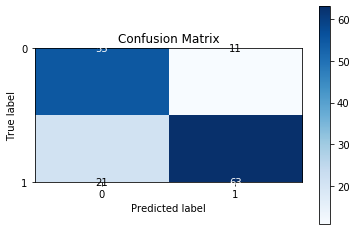

'Lo score e stato calcolato standardizzando i dati, score: 0.7866666666666666'

In [7]:
addestraSVC('Admission_Predict_Ver1', X=X, y=y, c=0.2, gamma=0.1, kernel='rbf', dim=7)

In [8]:
#cerco gli iperparametri per un DecisionTreeClassifier
trovaIperparametri(model=DecisionTreeClassifier, numero_dimensioni=8, X=X, y=y)

--- 0.2664647102355957 seconds ---


{'reduce_dim__n_components': 5, 'tree__criterion': 'entropy'}

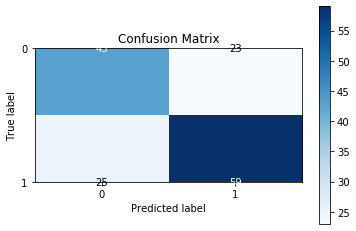

'Lo score e stato calcolato standardizzando i dati, score: 0.68'

In [9]:
addestraDecisionTreeClassifier('Admission_Predict_Ver1', X=X, y=y, criterio='entropy', dim=3)

In [10]:
# cerco gli iperparametri per un RandomForestClassifier
trovaIperparametri(X=X, y=y, model=RandomForestClassifier, numero_dimensioni=8)

--- 13.465691804885864 seconds ---


{'random_forest__n_estimators': 70, 'reduce_dim__n_components': 3}

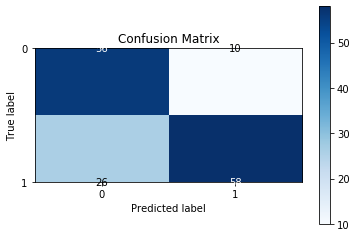

'Lo score e stato calcolato standardizzando i dati, score: 0.76'

In [11]:
addestraRandomForestClassifier('Admission_Predict_Ver1.1', X=X, y=y, dim=3, n_estimators=50)

In [12]:
#trovo iperparametri per un LinearDiscriminantAnalysis
trovaIperparametri(model=LinearDiscriminantAnalysis, X=X, y=y, numero_dimensioni=8)

--- 0.3817300796508789 seconds ---


{'linear_discriminant_analysis__solver': 'svd', 'reduce_dim__n_components': 3}

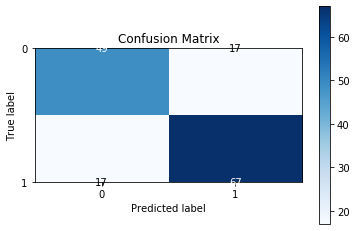

'Lo score e stato calcolato standardizzando i dati, score: 0.7733333333333333'

In [13]:
addestraLinearDiscriminantAnalysis(nomeDataset='Admission_Predict_Ver1.1', X=X, y=y, solver='svd', dim=3)

In [14]:
#trovo iperparametri per un GaussianNB
trovaIperparametri(model=GaussianNB, X=X, y=y, numero_dimensioni=8)

--- 0.20222234725952148 seconds ---


{'reduce_dim__n_components': 3}

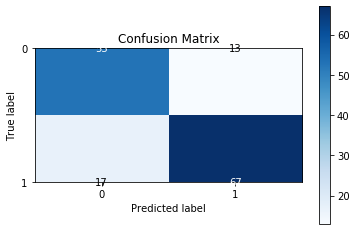

'Lo score e stato calcolato standardizzando i dati, score: 0.8'

In [15]:
addestraGaussianNB(nomeDataset='Admission_Predict_Ver1.1', X=X, y=y, dim=3)

In [16]:
#trovo iperparametri per un MLPClassifier
trovaIperparametri(X=X, y=y, model=MLPClassifier, numero_dimensioni=8)

--- 66.84989738464355 seconds ---


{'mlpClassifier__activation': 'relu',
 'mlpClassifier__learning_rate': 'constant',
 'mlpClassifier__learning_rate_init': 0.001,
 'reduce_dim__n_components': 3}

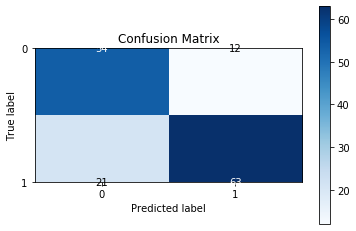

'Score: 0.78'

In [17]:
addestraMLPClassifier('Admission_Predict_Ver1.1', X=X, y=y, activation='relu', learning_rate='adaptive', learning_rate_init=0.0001, momentum=0.7, hidden_layer_sizes=(50, 50), dim=5, max_iter=500)

In [4]:
#Prendo come dataset IRIS
dataset = load_iris()
X = dataset['data']
y = dataset['target']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
X.shape

(150, 4)

In [20]:
#trovo iperparametri per una SVC
trovaIperparametri(X=X, y=y, model=SVC, numero_dimensioni=4)

--- 1.4524025917053223 seconds ---


{'SVM__C': 0.2,
 'SVM__gamma': 0.1,
 'SVM__kernel': 'linear',
 'reduce_dim__n_components': 3}

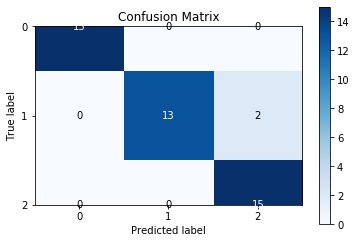

'Lo score e stato calcolato standardizzando i dati, score: 0.9555555555555556'

In [21]:
addestraSVC(nomeDataset='IRIS', X=X, y=y, c=0.2, gamma=0.1, kernel='linear', dim=3)

In [22]:
#trovo iperparametri per una RandomForest
trovaIperparametri(model=RandomForestClassifier, X=X, y=y, numero_dimensioni=4)

--- 4.35167670249939 seconds ---


{'random_forest__n_estimators': 20, 'reduce_dim__n_components': 3}

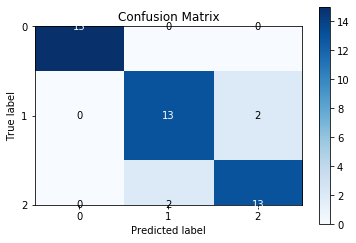

'Lo score e stato calcolato standardizzando i dati, score: 0.9111111111111111'

In [23]:
addestraRandomForestClassifier(nomeDataset='IRIS', X=X, y=y, dim=3, n_estimators=50)

In [24]:
#trovo iperparametri per un DecisionTree
trovaIperparametri(model=DecisionTreeClassifier, X=X, y=y, numero_dimensioni=4)

--- 0.16812562942504883 seconds ---


{'reduce_dim__n_components': 1, 'tree__criterion': 'gini'}

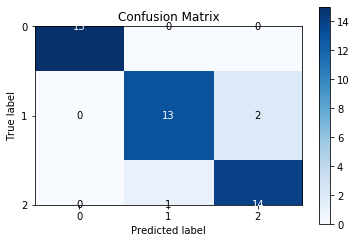

'Lo score e stato calcolato standardizzando i dati, score: 0.9333333333333333'

In [25]:
addestraDecisionTreeClassifier(nomeDataset='IRIS', X=X, y=y, dim=3, criterio='gini')

In [26]:
#trovo iperparametri per un GaussianNB
trovaIperparametri(model=GaussianNB, X=X, y=y, numero_dimensioni=4)

--- 0.043215274810791016 seconds ---


{'reduce_dim__n_components': 3}

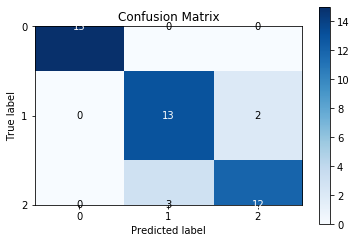

'Lo score e stato calcolato standardizzando i dati, score: 0.8888888888888888'

In [27]:
addestraGaussianNB(nomeDataset='IRIS', X=X, y=y, dim=3)

In [28]:
#trovo iperparametri per un 
trovaIperparametri(model=LinearDiscriminantAnalysis, X=X, y=y, numero_dimensioni=4)

--- 0.10226035118103027 seconds ---


{'linear_discriminant_analysis__solver': 'svd', 'reduce_dim__n_components': 3}

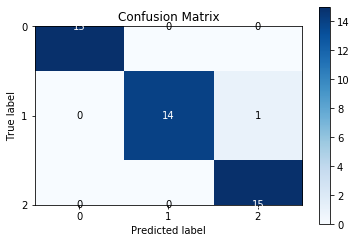

'Lo score e stato calcolato standardizzando i dati, score: 0.9777777777777777'

In [29]:
addestraLinearDiscriminantAnalysis(nomeDataset='IRIS', X=X, y=y, solver='svd', dim=3)

In [30]:
#trova iperparametri per un MLPCLassifier
trovaIperparametri(X=X, y=y, model=MLPClassifier, numero_dimensioni=4)

--- 15.833383798599243 seconds ---


{'mlpClassifier__activation': 'logistic',
 'mlpClassifier__learning_rate': 'constant',
 'mlpClassifier__learning_rate_init': 0.01,
 'reduce_dim__n_components': 3}

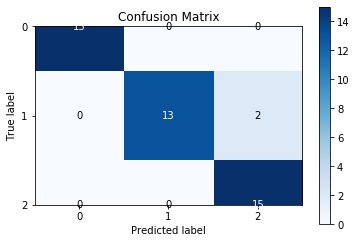

'Score: 0.9555555555555556'

In [31]:
addestraMLPClassifier(nomeDataset='Admission_Predict_Ver1.1', X=X, y=y, activation='relu', learning_rate='constant', learning_rate_init=0.01, momentum=0.9, hidden_layer_sizes=(50), dim=3, max_iter=500)

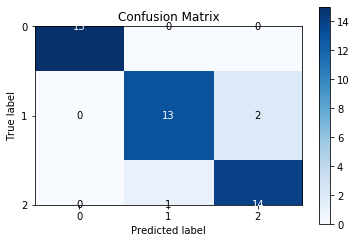

'Score: 0.9333333333333333'

In [32]:
addestraMLPClassifier(nomeDataset='Admission_Predict_Ver1.1', X=X, y=y, activation='relu', learning_rate='constant', learning_rate_init=0.01, momentum=0.9, hidden_layer_sizes=(500), dim=3, max_iter=500)

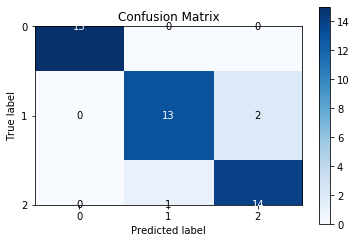

'Score: 0.9333333333333333'

In [33]:
addestraMLPClassifier(nomeDataset='Admission_Predict_Ver1.1', X=X, y=y, activation='relu', learning_rate='constant', learning_rate_init=0.01, momentum=0.1, hidden_layer_sizes=(500, 500), dim=3, max_iter=500)

In [34]:
dataset = load_breast_cancer()
X = dataset['data']
y = dataset['target']

In [35]:
X.shape

(569, 30)

In [36]:
trovaIperparametri(X=X, y=y, model=MLPClassifier, numero_dimensioni=30)

--- 304.4252841472626 seconds ---


{'mlpClassifier__activation': 'logistic',
 'mlpClassifier__learning_rate': 'constant',
 'mlpClassifier__learning_rate_init': 0.001,
 'reduce_dim__n_components': 13}

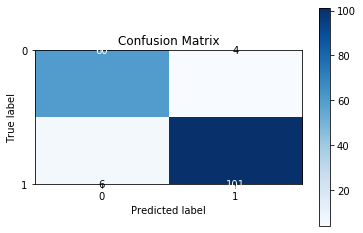

'Score: 0.9415204678362573'

In [37]:
addestraMLPClassifier(nomeDataset='cancer', X=X, y=y, activation='logistic', learning_rate='constant', momentum=0.9, learning_rate_init=0.001, dim=13, hidden_layer_sizes=(50), max_iter=500)

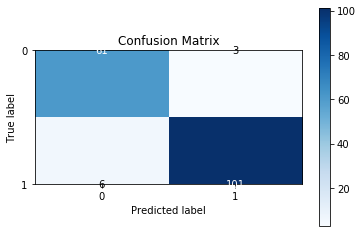

'Score: 0.9473684210526315'

In [38]:
addestraMLPClassifier(nomeDataset='cancer', X=X, y=y, activation='logistic', learning_rate='constant', momentum=0.9, learning_rate_init=0.001, dim=13, hidden_layer_sizes=(50, 50), max_iter=500)

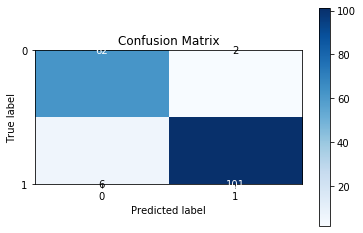

'Score: 0.9532163742690059'

In [39]:
addestraMLPClassifier(nomeDataset='cancer', X=X, y=y, activation='logistic', learning_rate='constant', momentum=0.9, learning_rate_init=0.001, dim=13, hidden_layer_sizes=(50, 50, 50), max_iter=500)

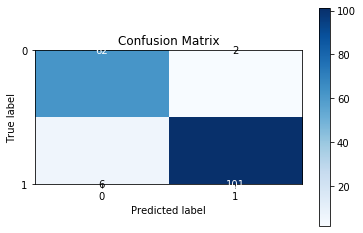

'Score: 0.9532163742690059'

In [40]:
addestraMLPClassifier(nomeDataset='cancer', X=X, y=y, activation='logistic', learning_rate='constant', momentum=0.9, learning_rate_init=0.001, dim=13, hidden_layer_sizes=(150, 150, 150), max_iter=500)

In [41]:
#trova iperparametri per una SVC
trovaIperparametri(model=SVC, X=X, y=y, numero_dimensioni=30)

--- 25.04281735420227 seconds ---


{'SVM__C': 0.8,
 'SVM__gamma': 0.1,
 'SVM__kernel': 'linear',
 'reduce_dim__n_components': 9}

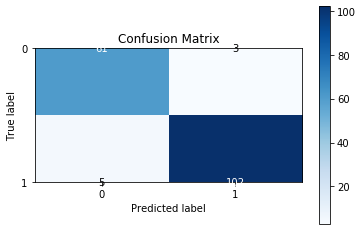

'Lo score e stato calcolato standardizzando i dati, score: 0.9532163742690059'

In [42]:
addestraSVC(nomeDataset='cancer', X=X, y=y, dim=9, c=0.8, gamma=0.1, kernel='linear')